<font size='6'>Python for Algorithms </font>

***
Course: [Udemy](#https://www.udemy.com/python-for-data-structures-algorithms-and-interviews/learn/v4/content)
***

# Dijkstra Algorithm
One algorithm for finding the shortest path from a starting node to a target node in a weighted graph is Dijkstra’s algorithm. The algorithm creates a tree of shortest paths from the starting vertex, the source, to all other points in the graph. The graph can either be directed or undirected. One stipulation to using the algorithm is that the graph needs to have a nonnegative weight on every edge.
In Dijkstra's algorithm, the edge has a large weight--the shortest path tree found by the algorithm will try to avoid edges with larger weights.


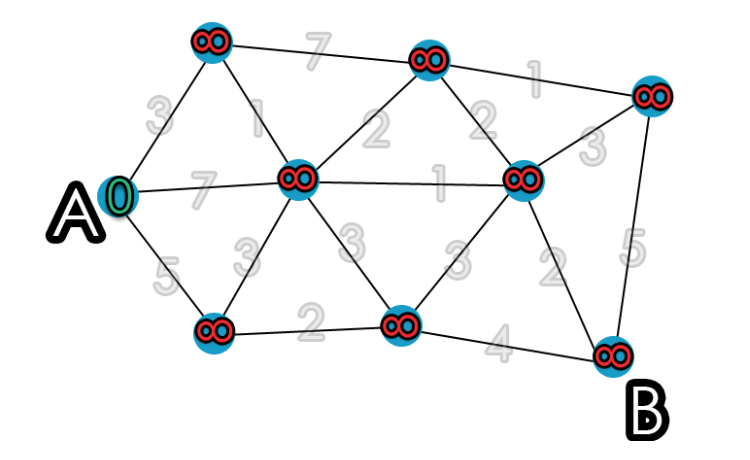

Dijkstra’s algorithm finds a shortest path tree from a single source node, by building a set of nodes that have minimum distance from the source. 

The graph has the following: 
* vertices, or nodes, denoted in the algorithm by $v$ or $u$;
* weighted edges that connect two nodes: $(u,v)$ denotes an edge, and $w(u,v)$ denotes its weight. In the diagram on the right, the weight for each edge is written in gray.

This is done by initializing three values: 
* $dist$, an array of distances from the source node $s$ to each node in the graph, initialized the following way: $dist(s) = 0$; and for all other nodes $v$, $dist(v) = \infty$. This is done at the beginning because as the algorithm proceeds, the $dist$ from the source to each node $v$ in the graph will be recalculated and finalized when the shortest distance to $v$ is found
* $Q$, a queue of all nodes in the graph. At the end of the algorithm's progress, $Q$ will be empty.
* $S$, an empty set, to indicate which nodes the algorithm has visited. At the end of the algorithm's run, $S$ will contain all the nodes of the graph.

The algorithm proceeds as follows: 
* While $Q$ is not empty, pop the node $v$, that is not already in $S$, from $Q$ with the smallest $dist(v)$. In the first run, source node $s$ will be chosen because $dist(s)$ was initialized to 0. In the next run, the next node with the smallest $dist$ value is chosen.
* Add node $v$ to $S$, to indicate that $v$ has been visited
* Update $dist$ values of adjacent nodes of the current node $v$ as follows: for each new adjacent node $u$,
* if $dist(v)$ + $weight(u,v)$ < $dist (u)$, there is a new minimal distance found for $u$, so update $dist (u)$ to the new minimal distance value;
* otherwise, no updates are made to $dist (u)$.

**pseudo code**

```
function Dijkstra(Graph, source):
       dist[source]  := 0               # Distance from source to source is set to 0
       for each vertex v in Graph:      # Initializations
           if v ≠ source
               dist[v]  := infinity  # Unknown distance function from S to each node set to infinity
           add v to Q                # All nodes initially in Q

      while Q is not empty:                 # The main loop
          v := vertex in Q with min dist[v]  # In the first run-through, this vertex is the s node
          remove v from Q 

          for each neighbor u of v:           # where neighbor u has not yet been removed from Q.
              alt := dist[v] + length(v, u)
              if alt < dist[u]:               # A shorter path to u has been found
                  dist[u]  := alt            # Update distance of u 

      return dist[]
  end function


```

In [8]:
# =============================================================================
# We will create a dictionary to represent the graph
# =============================================================================
graph = {

'a':{'b':3,'c':4, 'd':7},
'b':{'c':1,'f':5},
'c':{'f':6,'d':2},
'd':{'e':3, 'g':6},
'e':{'g':3, 'h':4},
'f':{'e':1, 'h':8},
'g':{'h':2},
'h':{'g':2}
}

In [5]:

def dijkstra(graph,start,goal):

    shortest_distance = {} #dictionary to record the cost to reach to node. We will constantly update this dictionary as we move along the graph.
    track_predecessor = {} #dictionary to keep track of path that led to that node.
    unseenNodes = graph #to iterate through all nodes
    infinity = 5000 #infinity can be considered a very large number
    track_path = [] #dictionary to record as we trace back our journey

    # =============================================================================
    # Initially we want to assign 0 as the cost to reach to source node and infinity as cost to all other nodes
    # =============================================================================

    for node in unseenNodes:
        shortest_distance[node] = infinity

    shortest_distance[start] = 0

    # =============================================================================
    # The loop will keep running until we have entirely exhausted the graph, until we have seen all the nodes
    # =============================================================================
    # =============================================================================
    # To iterate through the graph, we need to determine the min_distance_node every time.
    # =============================================================================

    while unseenNodes:
        min_distance_node = None

        for node in unseenNodes:
            if min_distance_node is None:
                min_distance_node = node

            elif shortest_distance[node] < shortest_distance[min_distance_node]:
                min_distance_node = node

    # =============================================================================
    # From the minimum node, what are our possible paths
    # =============================================================================

        path_options = graph[min_distance_node].items()


    # =============================================================================
    # We have to calculate the cost each time for each path we take and only update it if it is lower than the existing cost
    # =============================================================================

        for child_node, weight in path_options:

            if weight + shortest_distance[min_distance_node] < shortest_distance[child_node]:

                shortest_distance[child_node] = weight + shortest_distance[min_distance_node]

                track_predecessor[child_node] = min_distance_node

    # =============================================================================
    # We want to pop out the nodes that we have just visited so that we dont iterate over them again.
    # =============================================================================
        unseenNodes.pop(min_distance_node)

    # =============================================================================
    # Once we have reached the destination node, we want trace back our path and calculate the total accumulated cost.
    # =============================================================================

    currentNode = goal

    while currentNode != start:

        try:
            track_path.insert(0,currentNode)
            currentNode = track_predecessor[currentNode]
        except KeyError:
            print('Path not reachable')
            break
    track_path.insert(0,start)


    # =============================================================================
    #  If the cost is infinity, the node had not been reached.
    # =============================================================================
    if shortest_distance[goal] != infinity:
        print('Shortest distance is ' + str(shortest_distance[goal]))
        print('And the path is ' + str(track_path))



In [9]:
dijkstra(graph, 'a', 'c')

Shortest distance is 4
And the path is ['a', 'c']
